## K-means Crop_Yield

In [163]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


## Loading the Dataset

In [166]:
# Loading the dataset
df = pd.read_csv('yield_df.csv')


In [168]:
df

,Unnamed: 0,Area,Item,Year,Yield,Avg Rainfall,Pesticides,Temperature,k_labels,Cluster
0,0,Albania,Maize,1990,36613,1485,121.00,16.37,1,1
1,1,Albania,Potatoes,1990,66667,1485,121.00,16.37,1,1
2,2,Albania,Rice,1990,23333,1485,121.00,16.37,1,1
3,3,Albania,Sorghum,1990,12500,1485,121.00,16.37,0,0
4,4,Albania,Soybeans,1990,7000,1485,121.00,16.37,0,0
...,...,...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,Rice,2013,22581,657,2550.07,19.76,1,1
28238,28238,Zimbabwe,Sorghum,2013,3066,657,2550.07,19.76,1,1
28239,28239,Zimbabwe,Soybeans,2013,13142,657,2550.07,19.76,1,1
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657,2550.07,19.76,1,1


## Adding Features to the DF

In [171]:
df['Item'].unique()

array(['Maize', 'Potatoes', 'Rice', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

## EDA

In [174]:
df.isna().sum()

Unnamed: 0      0
Area            0
Item            0
Year            0
Yield           0
Avg Rainfall    0
Pesticides      0
Temperature     0
k_labels        0
Cluster         0
dtype: int64

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    28242 non-null  int64  
 1   Area          28242 non-null  object 
 2   Item          28242 non-null  object 
 3   Year          28242 non-null  int64  
 4   Yield         28242 non-null  int64  
 5   Avg Rainfall  28242 non-null  int64  
 6   Pesticides    28242 non-null  float64
 7   Temperature   28242 non-null  float64
 8   k_labels      28242 non-null  int64  
 9   Cluster       28242 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 2.2+ MB


In [178]:
# Displaying first few rows
df.head()

,Unnamed: 0,Area,Item,Year,Yield,Avg Rainfall,Pesticides,Temperature,k_labels,Cluster
0,0,Albania,Maize,1990,36613,1485,121.0,16.37,1,1
1,1,Albania,Potatoes,1990,66667,1485,121.0,16.37,1,1
2,2,Albania,Rice,1990,23333,1485,121.0,16.37,1,1
3,3,Albania,Sorghum,1990,12500,1485,121.0,16.37,0,0
4,4,Albania,Soybeans,1990,7000,1485,121.0,16.37,0,0


In [180]:
# Selecting relevant features for clustering
features = ["Yield", "Avg Rainfall", "Pesticides", "Temperature"]
df_cluster = df[features].dropna()  # Removing any missing values

In [182]:
df_cluster

,Yield,Avg Rainfall,Pesticides,Temperature
0,36613,1485,121.00,16.37
1,66667,1485,121.00,16.37
2,23333,1485,121.00,16.37
3,12500,1485,121.00,16.37
4,7000,1485,121.00,16.37
...,...,...,...,...
28237,22581,657,2550.07,19.76
28238,3066,657,2550.07,19.76
28239,13142,657,2550.07,19.76
28240,22222,657,2550.07,19.76


In [184]:
# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

In [186]:
df_scaled

array([[-0.47602001,  0.47329419, -0.61636612, -0.66106889],
       [-0.12225671,  0.47329419, -0.61636612, -0.66106889],
       [-0.63233786,  0.47329419, -0.61636612, -0.66106889],
       ...,
       [-0.75229534, -0.69323228, -0.57585308, -0.12399147],
       [-0.64541536, -0.69323228, -0.57585308, -0.12399147],
       [-0.63757593, -0.69323228, -0.57585308, -0.12399147]])

## Preparing the Data (X and lable)

In [268]:
# using only two independent variables / features for this pass
X = df.drop(['Area', 'Item'], axis = 1)
label = df['Item']

In [270]:
X

,Unnamed: 0,Year,Yield,Avg Rainfall,Pesticides,Temperature,k_labels,Cluster
0,0,1990,36613,1485,121.00,16.37,1,1
1,1,1990,66667,1485,121.00,16.37,1,1
2,2,1990,23333,1485,121.00,16.37,1,1
3,3,1990,12500,1485,121.00,16.37,0,0
4,4,1990,7000,1485,121.00,16.37,0,0
...,...,...,...,...,...,...,...,...
28237,28237,2013,22581,657,2550.07,19.76,1,1
28238,28238,2013,3066,657,2550.07,19.76,1,1
28239,28239,2013,13142,657,2550.07,19.76,1,1
28240,28240,2013,22222,657,2550.07,19.76,1,1


In [272]:
# one hot encoding needed
# one-hot encoding
X = pd.get_dummies(X, drop_first=True)
X.head()

,Unnamed: 0,Year,Yield,Avg Rainfall,Pesticides,Temperature,k_labels,Cluster
0,0,1990,36613,1485,121.0,16.37,1,1
1,1,1990,66667,1485,121.0,16.37,1,1
2,2,1990,23333,1485,121.0,16.37,1,1
3,3,1990,12500,1485,121.0,16.37,0,0
4,4,1990,7000,1485,121.0,16.37,0,0


## Standardizing the Data

In [275]:
# seperated out the fit and transform for clarity
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X[0:5]

array([[-1.73198948, -1.63707532, -0.47602001,  0.47329419, -0.61636612,
        -0.66106889,  0.91921583,  0.91921583],
       [-1.73186682, -1.63707532, -0.12225671,  0.47329419, -0.61636612,
        -0.66106889,  0.91921583,  0.91921583],
       [-1.73174416, -1.63707532, -0.63233786,  0.47329419, -0.61636612,
        -0.66106889,  0.91921583,  0.91921583],
       [-1.73162151, -1.63707532, -0.75985227,  0.47329419, -0.61636612,
        -0.66106889, -0.84933062, -0.84933062],
       [-1.73149885, -1.63707532, -0.82459234,  0.47329419, -0.61636612,
        -0.66106889, -0.84933062, -0.84933062]])

## PCA PROJECTION - reducing to 2D for easier visualization

In [278]:
# instantiate instance of PCA
pca = PCA(n_components=2)

In [280]:
princ_comps = pca.fit_transform(X)

In [282]:
princ_comps_df = pd.DataFrame(data = princ_comps, columns = ['princ_comp1', 'princ_comp2'])
princ_comps_df.head()

,princ_comp1,princ_comp2
0,0.853835,0.490185
1,0.906113,0.510409
2,0.830731,0.481083
3,-1.215711,0.309188
4,-1.225280,0.305407


## Visualizing 2D Projection

In [285]:
princ_comps_df['label'] = label
princ_comps_df.head()

,princ_comp1,princ_comp2,label
0,0.853835,0.490185,Maize
1,0.906113,0.510409,Potatoes
2,0.830731,0.481083,Rice
3,-1.215711,0.309188,Sorghum
4,-1.225280,0.305407,Soybeans


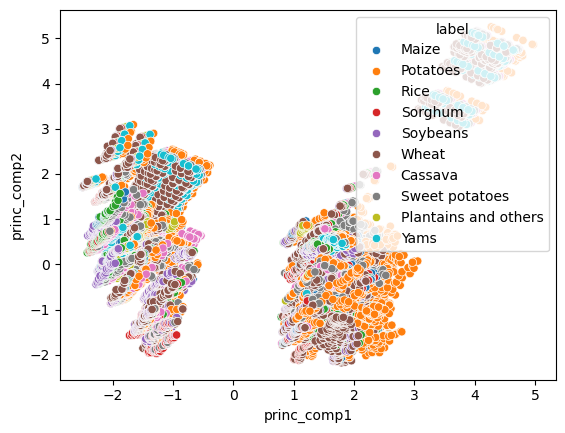

In [287]:
sns.scatterplot(data = princ_comps_df, x= 'princ_comp1', y = 'princ_comp2', hue='label');

# Explained Variance

In [290]:
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([0.36006124, 0.19538398]), 0.5554452208761474)

In [292]:
print(f'These principal component contains ~ {(sum(pca.explained_variance_ratio_)) *100:.3}% of the information in the dataset.')

These principal component contains ~ 55.5% of the information in the dataset.


## KMeans Clustering

In [295]:
# Make an instance of KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit only on a features matrix
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [297]:
# Get labels and cluster centroids
k_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [299]:
k_labels, centroids

(array([1, 1, 1, ..., 1, 1, 1]),
 array([[-0.05322244, -0.06864215, -0.17541929,  0.38511183, -0.16133175,
          0.67368462, -0.84933062, -0.84933062],
        [ 0.17470467,  0.00855064,  0.23023014, -0.59465011, -0.16226468,
         -0.94096531,  0.91921583,  0.91921583],
        [-1.20167848,  0.98637562,  0.08271625,  0.86213635,  4.45193841,
          0.34670382,  2.68776228,  2.68776228]]))

In [301]:
df.head()

,Unnamed: 0,Area,Item,Year,Yield,Avg Rainfall,Pesticides,Temperature,k_labels,Cluster
0,0,Albania,Maize,1990,36613,1485,121.0,16.37,1,1
1,1,Albania,Potatoes,1990,66667,1485,121.0,16.37,1,1
2,2,Albania,Rice,1990,23333,1485,121.0,16.37,1,1
3,3,Albania,Sorghum,1990,12500,1485,121.0,16.37,0,0
4,4,Albania,Soybeans,1990,7000,1485,121.0,16.37,0,0


In [303]:
df['k_labels'] = k_labels
df.to_csv('./yield_df.csv')
df.head()

,Unnamed: 0,Area,Item,Year,Yield,Avg Rainfall,Pesticides,Temperature,k_labels,Cluster
0,0,Albania,Maize,1990,36613,1485,121.0,16.37,1,1
1,1,Albania,Potatoes,1990,66667,1485,121.0,16.37,1,1
2,2,Albania,Rice,1990,23333,1485,121.0,16.37,1,1
3,3,Albania,Sorghum,1990,12500,1485,121.0,16.37,0,0
4,4,Albania,Soybeans,1990,7000,1485,121.0,16.37,0,0


In [305]:
df.tail()

,Unnamed: 0,Area,Item,Year,Yield,Avg Rainfall,Pesticides,Temperature,k_labels,Cluster
28237,28237,Zimbabwe,Rice,2013,22581,657,2550.07,19.76,1,1
28238,28238,Zimbabwe,Sorghum,2013,3066,657,2550.07,19.76,1,1
28239,28239,Zimbabwe,Soybeans,2013,13142,657,2550.07,19.76,1,1
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657,2550.07,19.76,1,1
28241,28241,Zimbabwe,Wheat,2013,22888,657,2550.07,19.76,1,1


In [307]:
# do some EDA on the outputs...
df[['Area', 'Item', 'k_labels']].value_counts()


Area          Item            k_labels
India         Sweet potatoes  0           506
              Rice            0           506
              Sorghum         0           506
              Maize           0           506
              Wheat           0           506
                                         ... 
Malaysia      Soybeans        0             1
Saudi Arabia  Wheat           1             1
Rwanda        Yams            1             1
Albania       Sorghum         1             1
South Africa  Maize           0             1
Name: count, Length: 668, dtype: int64

## Visually Evaluating the Clusters per Proximity to the Centroids

In [310]:
centroids

array([[-0.05322244, -0.06864215, -0.17541929,  0.38511183, -0.16133175,
         0.67368462, -0.84933062, -0.84933062],
       [ 0.17470467,  0.00855064,  0.23023014, -0.59465011, -0.16226468,
        -0.94096531,  0.91921583,  0.91921583],
       [-1.20167848,  0.98637562,  0.08271625,  0.86213635,  4.45193841,
         0.34670382,  2.68776228,  2.68776228]])

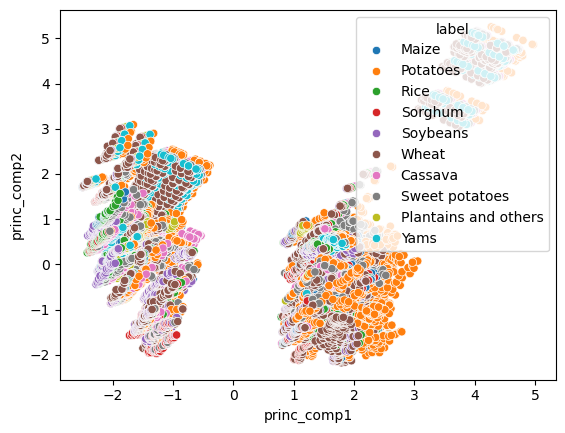

In [312]:
# once beyond 3 dimensions you can visually look to see your segments
sns.scatterplot(data = princ_comps_df, x= 'princ_comp1', y = 'princ_comp2', hue='label');

## Findings and Summary

### Key Observations  
   - **Cluster 1**: Includes crops that thrive in **low rainfall and high-temperature conditions**, possibly drought-resistant crops like **sorghum**.
   - **Cluster 2**: Represents **high-yield, high-pesticide-dependent crops**, such as **rice and maize**, which typically require intensive farming.
   - **Cluster 3**: Contains **moderate-yield crops with balanced pesticide usage**, possibly including **yams and cassava**, which are often grown with moderate inputs.

3. **PCA Insights**  
   - **Principal Component Analysis (PCA)** was applied to reduce dimensionality for visualization.
   - The first **two principal components** capture most of the variance, making it possible to represent clusters in **2D scatter plots**.
 
### **Summary:**
The **K-Means clustering approach** successfully segmented **crops** based on **yield, rainfall, pesticide usage, and temperature**. These insights are valuable for:

- **Agricultural Decision-Making**: Identifying which **crops are best suited for different climate conditions**.
- **Sustainable Farming Practices**: Understanding **which crops require high pesticide use** and how to optimize resource allocat, proon.fitability and farmer income.

